In [1]:
# importing libaries ----
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import savefig
from sklearn.ensemble import IsolationForest
# Generating data ----

rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

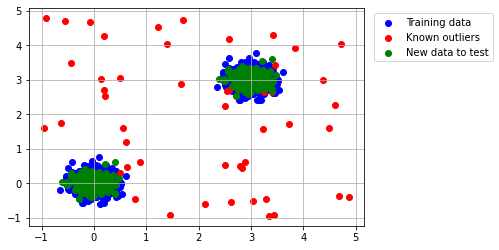

In [26]:
plt.scatter(X_train["x1"],X_train["x2"],c="blue")
plt.scatter(X_outliers["x1"],X_outliers["x2"],c="red")
plt.scatter(X_test["x1"],X_test["x2"],c="green")
plt.grid()
plt.legend(["Training data","Known outliers","New data to test"],loc="upper right",bbox_to_anchor=(1.4,1))
plt.show()


In [46]:

# Isolation Forest ----

# training the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)

# predictions
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# new, 'normal' observations ----
print("Accuracy:", list(y_pred_test).count(1)/y_pred_test.shape[0])
# outliers ----
print("Accuracy:", list(y_pred_outliers).count(-1)/y_pred_outliers.shape[0])

Accuracy: 0.6025
Accuracy: 0.98


**Pretty bad to be fair.**